<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [ ]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [ ]:
# insert code here

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Check some data

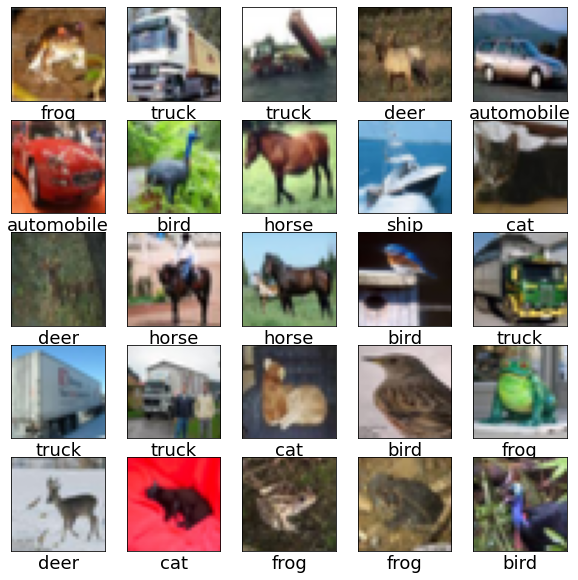

In [131]:
# insert code here
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Prepare data

In [ ]:
# insert code here

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [3]:
# insert code here
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## Compile the model

In [4]:
# insert code here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Fit the training data

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [5]:
%%time
# insert code here

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.5196 - accuracy: 0.4435 - val_loss: 1.2850 - val_accuracy: 0.5469
Epoch 2/10
1563/1563 [==============================] - 107s 69ms/step - loss: 1.1511 - accuracy: 0.5936 - val_loss: 1.0930 - val_accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.0001 - accuracy: 0.6478 - val_loss: 0.9874 - val_accuracy: 0.6509
Epoch 4/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.8987 - accuracy: 0.6845 - val_loss: 0.9344 - val_accuracy: 0.6731
Epoch 5/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.8316 - accuracy: 0.7087 - val_loss: 0.9348 - val_accuracy: 0.6770
Epoch 6/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.7734 - accuracy: 0.7306 - val_loss: 0.8769 - val_accuracy: 0.6984
Epoch 7/10
1563/1563 [==============================] - 129s 82ms/step - loss: 0.7285 - accuracy: 0.7454 - val_loss: 0

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [130]:
%load_ext tensorboard
%tensorboard --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 46092.

## Create predictions

In [119]:
#
# Here we get the predictions
predict = model.predict(test_images)
predictions = np.argmax(predict, axis=-1)

In [ ]:
#
# Lets find the confusion matrix for the model
#


In [120]:
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [121]:
from sklearn.metrics import confusion_matrix
#print(test_labels[2][0])
cm = confusion_matrix(test_labels, predictions)
print_cm(cm)

 |   0   1   2   3   4   5   6   7   8   9 
-------------------------------------------
0| 835  22  32  10  15   5   2  14  56   9 
1|  47 874  14   8   4   3   6   4  14  26 
2| 117   5 618  44  85  59  26  32   9   5 
3|  61  11 104 488  64 159  54  42  13   4 
4|  41   5 121  45 648  29  34  70   7   0 
5|  33   7  79 162  43 597  18  54   3   4 
6|  12   5  89  56  39  24 760   8   5   2 
7|  38   1  54  32  67  63  10 727   5   3 
8| 136  35  17  19   7  12   4   8 754   8 
9|  93 166  20  24   9  11   9  22  40 606 


## Evaluate the model

In [129]:
# insert code here
# (see below)

## Visualisation of cost

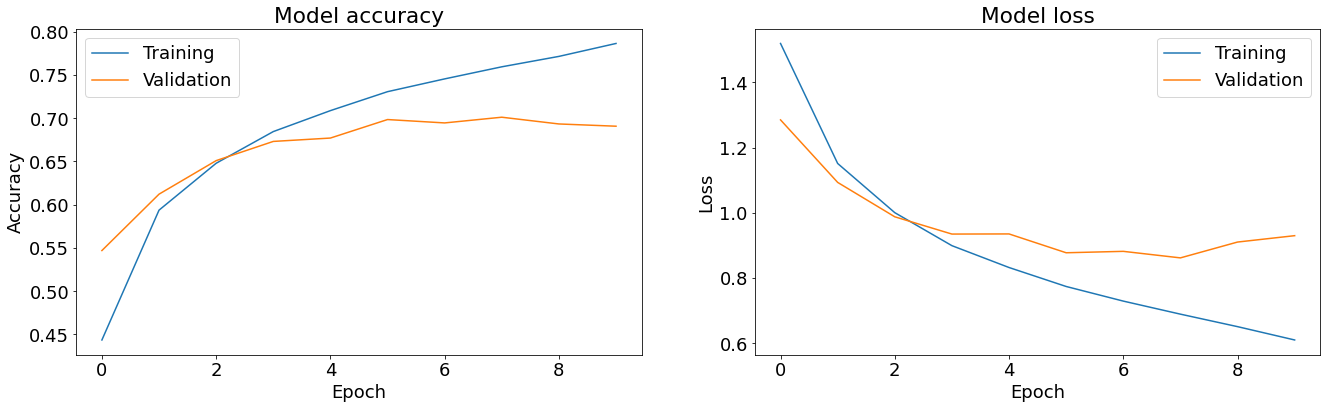

In [126]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'], label = 'Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [ ]:
#
# FROM THIS WE LEARN
#
# That the model gets over-fitted on epoch 5
#  Continuing after this will get WORSE results

## Results

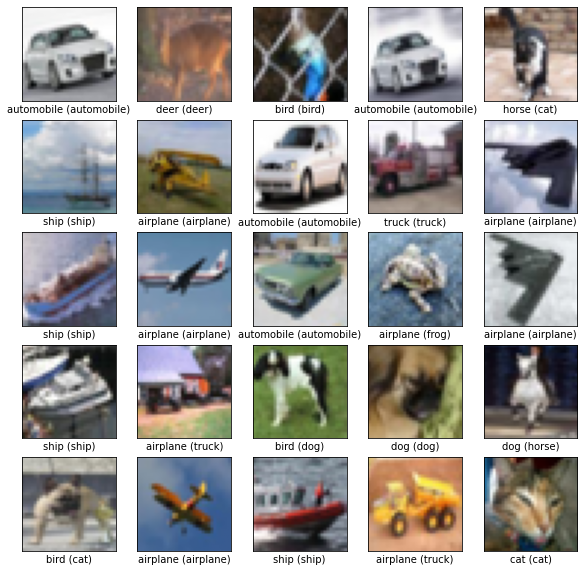

In [128]:
# insert code here

import random
#
# Lets select test images at random and dispaly what we think they are
#
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j = random.randrange(p.shape[0])
    plt.imshow(test_images[j], cmap=plt.cm.binary)
   
    # display what we think it is and what it actual is
    plt.xlabel("%s (%s)"%(class_names[predictions[j]],class_names[test_labels[j][0]]),fontsize=10)
    
plt.show()

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



